## Implement and understand Simple & Multiple Linear Regression.

### 1. Import and preprocess the dataset.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load dataset
data = pd.read_csv('Housing.csv')

In [3]:
# Preview the dataset
print("Data sample:")
# print(data.head())
display(data.head())

Data sample:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Data preprocessing: Convert 'yes'/'no' and categorical columns using one-hot encoding

for col in ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']:
    data[col] = data[col].map({'yes':1, 'no':0})

In [5]:
# One-hot encoding for 'furnishingstatus'

data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)

In [6]:
print("\nData after encoding:")
display(data.head())


Data after encoding:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


### 2. Split data into train-test sets

In [7]:
# Define features(X) and label(y)

X = data.drop('price', axis=1)
y = data['price']

In [8]:
# Train-test split (80/20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Fit a Linear Regression model using sklearn.linear_model.


In [9]:
# Fit linear regression model

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

### 4. Evaluate model using MAE, MSE, R²

In [10]:
# Predict & evaluate

y_pred = linreg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")



Model Evaluation:
Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
R² Score: 0.6529


### 5. Plot regression line and interpret coefficients

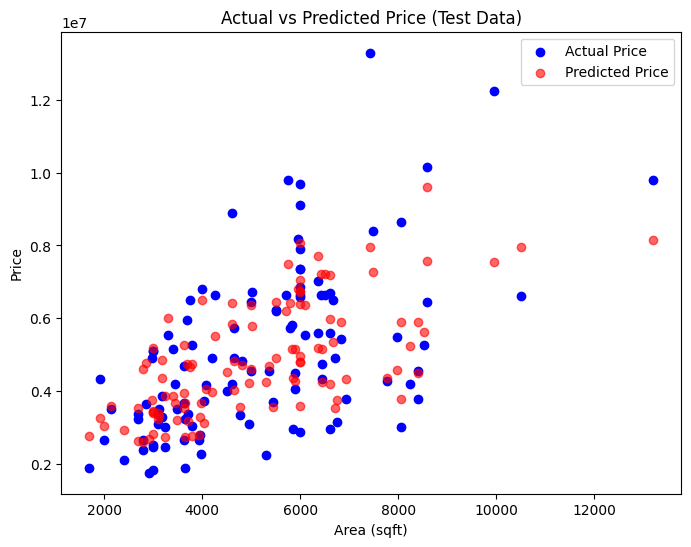

In [11]:
# Visualize regression (for area vs price as a simple regression)

plt.figure(figsize=(8,6))
plt.scatter(X_test['area'], y_test, color='blue', label='Actual Price')
plt.scatter(X_test['area'], y_pred, color='red', label='Predicted Price', alpha=0.6)
plt.xlabel('Area (sqft)')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price (Test Data)')
plt.legend()
plt.savefig('area_price_scatter.png')
plt.show()

In [12]:
# Interpret Coefficients

coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": linreg.coef_
})
print("\nRegression Coefficients:")
print(coeff_df)


Regression Coefficients:
                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                          mainroad  3.679199e+05
5                         guestroom  2.316100e+05
6                          basement  3.902512e+05
7                   hotwaterheating  6.846499e+05
8                   airconditioning  7.914267e+05
9                           parking  2.248419e+05
10                         prefarea  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05
